In [1]:
!pip install pandas-datareader

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [3]:
import pandas_datareader.data as web
start='2013-01-01'
end='2023-01-01'

df=web.DataReader('JPM','stooq',start,end)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-12-30,132.81,134.33,132.44,134.10,9292519.0
2022-12-29,132.93,133.27,132.31,133.22,6585228.0
2022-12-28,131.85,133.41,131.01,132.46,8827738.0
2022-12-27,131.57,132.22,130.55,131.74,5410991.0
2022-12-23,130.58,131.44,129.64,131.28,5091905.0


In [4]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2013-01-08,34.6350,34.7126,34.3020,34.7126,2.572222e+07
2013-01-07,34.4385,34.7038,34.3462,34.6429,3.205830e+07
2013-01-04,33.9100,34.6606,33.9011,34.6036,3.210123e+07
2013-01-03,34.1320,34.1379,33.7164,34.0023,3.175870e+07
2013-01-02,34.3177,34.3324,33.7341,34.0721,4.118124e+07


In [5]:
#  Date becomes column and are removable.
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Volume
0,2022-12-30,132.81,134.33,132.44,134.10,9292519.0
1,2022-12-29,132.93,133.27,132.31,133.22,6585228.0
2,2022-12-28,131.85,133.41,131.01,132.46,8827738.0
3,2022-12-27,131.57,132.22,130.55,131.74,5410991.0
4,2022-12-23,130.58,131.44,129.64,131.28,5091905.0


In [6]:
df=df.drop(['Date'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,132.81,134.33,132.44,134.10,9292519.0
1,132.93,133.27,132.31,133.22,6585228.0
2,131.85,133.41,131.01,132.46,8827738.0
3,131.57,132.22,130.55,131.74,5410991.0
4,130.58,131.44,129.64,131.28,5091905.0


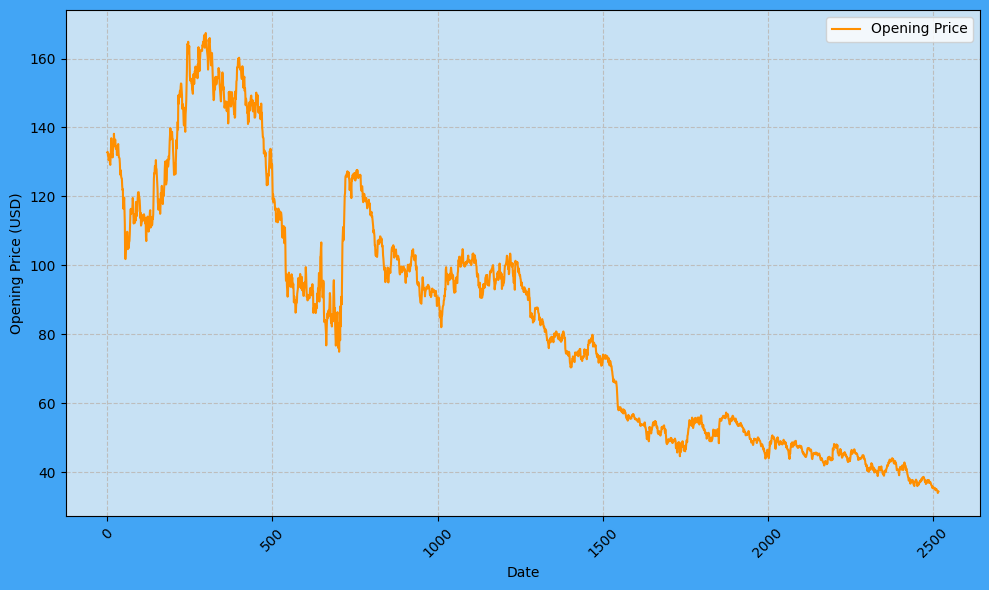

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

fig=plt.figure(figsize=(10,6))
fig.patch.set_facecolor('#42A5F5')

ax=plt.axes()
ax.set_facecolor('#C7E1F4')

plt.plot(df.Open, '#FF8F00', label='Opening Price')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Opening Price (USD)')
plt.xticks(rotation=45)

plt.grid(True,linestyle='--',color='#BDBDBD')
plt.tight_layout()
plt.show()

In [8]:
df

,Open,High,Low,Close,Volume
0,132.8100,134.3300,132.4400,134.1000,9.292519e+06
1,132.9300,133.2700,132.3100,133.2200,6.585228e+06
2,131.8500,133.4100,131.0100,132.4600,8.827738e+06
3,131.5700,132.2200,130.5500,131.7400,5.410991e+06
4,130.5800,131.4400,129.6400,131.2800,5.091905e+06
...,...,...,...,...,...
2513,34.6350,34.7126,34.3020,34.7126,2.572222e+07
2514,34.4385,34.7038,34.3462,34.6429,3.205830e+07
2515,33.9100,34.6606,33.9011,34.6036,3.210123e+07
2516,34.1320,34.1379,33.7164,34.0023,3.175870e+07


In [9]:
# ma100 is created for finding the mean of the 100 values and displaying them.
# for that rolling() function is used.

ma100=df.Open.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2513    37.321801
2514    37.238539
2515    37.158510
2516    37.084611
2517    37.008963
Name: Open, Length: 2518, dtype: float64

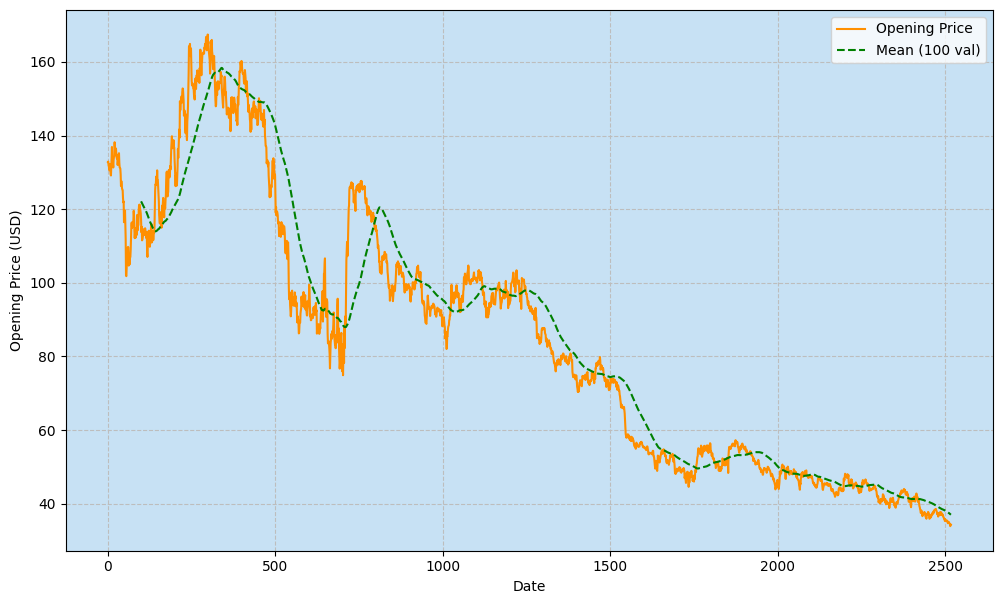

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
fig.patch.set_facecolor('#42A5F5')

ax=plt.axes()
ax.set_facecolor('#C7E1F4')

plt.grid(True,linestyle='--',color='#BDBDBD')
plt.tight_layout()

plt.plot(df.Open, '#FF8F00', label='Opening Price')
plt.plot(ma100,'g--',label='Mean (100 val)') # this is the mean of 100 values

plt.legend()
plt.xlabel('Date')
plt.ylabel('Opening Price (USD)')
plt.show()

In [11]:
ma200=df.Open.rolling(200).mean()
ma50=df.Open.rolling(50).mean()
ma75=df.Open.rolling(75).mean()
ma150=df.Open.rolling(150).mean()

Text(0, 0.5, 'Opening Price (USD)')

<Figure size 1200x600 with 0 Axes>

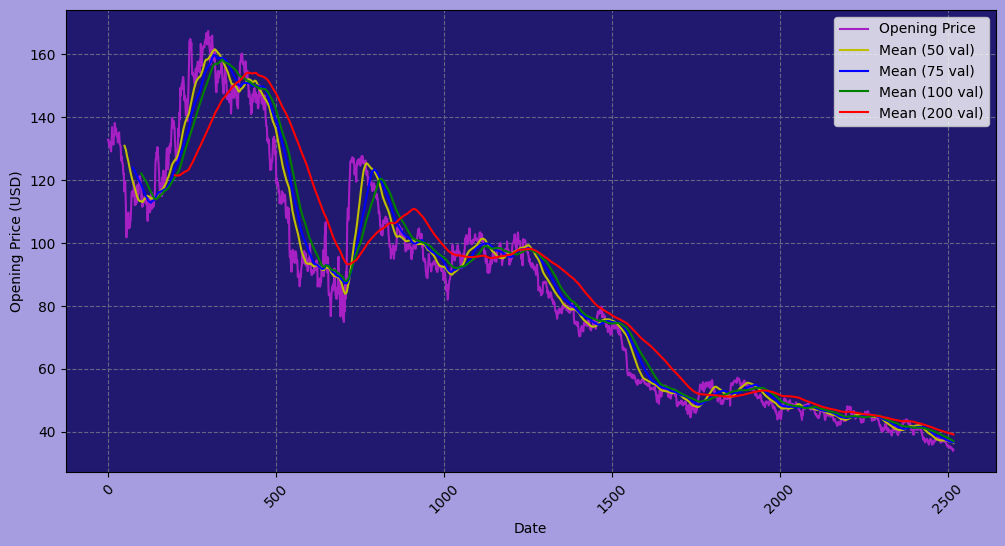

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

ma100=df.Open.rolling(100).mean()
ma100

fig=plt.figure(figsize=(12,6))
fig.patch.set_facecolor('#A59DDF')

ax=plt.axes()
ax.set_facecolor('#211970')

plt.grid(True,linestyle='--',color='#626784')
plt.xticks(rotation=45)

plt.plot(df.Open,'#A720C4',label='Opening Price')
plt.plot(ma50,'y',label='Mean (50 val)')
plt.plot(ma75,'b',label='Mean (75 val)')
plt.plot(ma100,'g',label='Mean (100 val)') # this is the mean of 100 values
plt.plot(ma200,'r',label='Mean (200 val)') # this is the mean of 200 values

plt.legend()
plt.xlabel('Date')
plt.ylabel('Opening Price (USD)')

In [13]:
df.shape

(2518, 5)

In [14]:
# splitting the data into training and testing
import pandas as pd

data_training = pd.DataFrame(df['Open'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Open'][int(len(df)*0.70):int(len(df))])

print("Used data for training: ", data_training.shape)
print("Used data for testing: ", data_testing.shape)

Used data for training:  (1762, 1)
Used data for testing:  (756, 1)


In [15]:
data_training.head()

,Open
0,132.81
1,132.93
2,131.85
3,131.57
4,130.58


In [16]:
data_testing.head()

,Open
1762,54.3802
1763,55.0767
1764,54.9126
1765,54.4588
1766,54.7338


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.71820622],
       [0.71918303],
       [0.71039173],
       ...,
       [0.05937059],
       [0.06597628],
       [0.06766453]])

In [18]:
import numpy as np

# The data is dependant on the previous result. (ma100) and (ma200)
# So, to calculate the next day value we train the following array.
# 100 days are x_train and 101 day is y_train and it goes on changing.

x_train = []
y_train = []


for i in range(100,data_training_array.shape[0]):
  x_train.append(data_training_array[i-100: i])
  y_train.append(data_training_array[i, 0])


x_train

# Now, converting x_train into numpy value, so that it can be provided to LSTM.
x_train,y_train = np.array(x_train), np.array(y_train)

In [19]:
!pip install tensorflow
!pip install tensorflow-addons==0.17.1

!pip install --upgrade tensorflow
!pip install --upgrade tensorflow-addons

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 67.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 58.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 71.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.7/347.7 kB 22.6 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installatio

In [20]:
import tensorflow as tf

# Use the recommended import path for LSTM
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [21]:

# Use the recommended import path for LSTM
from tensorflow.keras.layers import Dense, Dropout, LSTM, BatchNormalization
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import Orthogonal

# ... rest of your code ...
import tensorflow as tf


model = tf.keras.Sequential()
model.add(LSTM(units=50,
               activation ='relu',
               return_sequences = True,
               input_shape=(x_train.shape[1],1),
                recurrent_initializer="orthogonal"
               )
)
model.add(Dropout(0.2))


# Second Layer
model.add(LSTM(units=60,
               activation ='relu',
               return_sequences = True,
               recurrent_initializer="orthogonal"
               )
)
model.add(Dropout(0.3))



model.add(LSTM(units=80,
               activation ='relu',
               return_sequences = True,
               recurrent_initializer="orthogonal"
               )
)
model.add(Dropout(0.4))



model.add(LSTM(units=120,
               activation ='relu',
               recurrent_initializer="orthogonal"
               )
)
model.add(Dropout(0.5))



# Dense Layer - to connect all the layers
# model.add(Dense(units=1))
model.add(tf.keras.layers.Dense(units=1, kernel_initializer=Orthogonal(gain=1.0, seed=None)))

# Set Optimizer
opt = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
!pip install tensorflow-addons==0.17.1

!pip install --upgrade tensorflow
!pip install --upgrade tensorflow-addons

  Using cached tensorflow_addons-0.17.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.8 kB)
Using cached tensorflow_addons-0.17.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.1 MB)
  Attempting uninstall: tensorflow-addons
    Found existing installation: tensorflow-addons 0.23.0
    Uninstalling tensorflow-addons-0.23.0:
      Successfully uninstalled tensorflow-addons-0.23.0
  Using cached tensorflow_addons-0.23.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.8 kB)
Using cached tensorflow_addons-0.23.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (611 kB)
  Attempting uninstall: tensorflow-addons
    Found existing installation: tensorflow-addons 0.17.1
    Uninstalling tensorflow-addons-0.17.1:
      Successfully uninstalled tensorflow-addons-0.17.1


In [24]:
# Try importing AbstractRNNCell from tensorflow.python.keras.layers instead

from tensorflow.python.keras.layers import AbstractRNNCell

# Remove the incorrect import and keep the original correct one
# from tensorflow.python.keras.layers import Dense, Dropout, LSTM, BatchNormalization
from tensorflow.keras.layers import Dense, Dropout, LSTM, BatchNormalization # This line was already in a previous cell, keep it
from tensorflow.python.keras.callbacks import TensorBoard
from tensorflow.python.keras.callbacks import ModelCheckpoint

from tensorflow.python.keras.initializers import Orthogonal
from tensorflow.python.keras.metrics import MeanSquaredError, MeanAbsoluteError

model.compile(optimizer=opt,
              loss='mean_squared_error',  # Retain MSE for regression
              metrics=['accuracy',  # Include accuracy for reference (optional)
                       MeanSquaredError(),
                       MeanAbsoluteError()])

model.fit(x_train,y_train,epochs=150)

Epoch 1/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 39s 454ms/step - accuracy: 0.0016 - loss: 0.1082 - mean_absolute_error: 0.3097 - mean_squared_error: 0.1459
Epoch 2/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 31s 275ms/step - accuracy: 0.0012 - loss: 0.0159 - mean_absolute_error: 0.1697 - mean_squared_error: 0.0531
Epoch 3/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 279ms/step - accuracy: 0.0014 - loss: 0.0139 - mean_absolute_error: 0.1327 - mean_squared_error: 0.0354
Epoch 4/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 275ms/step - accuracy: 0.0029 - loss: 0.0093 - mean_absolute_error: 0.1159 - mean_squared_error: 0.0279
Epoch 5/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 281ms/step - accuracy: 0.0011 - loss: 0.0094 - mean_absolute_error: 0.1054 - mean_squared_error: 0.0236
Epoch 6/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 14s 274ms/step - accuracy: 3.0497e-04 - loss: 0.0074 - mean_absolute_error: 0.0981 - mean_squared_error: 0.0207
Epoch 7/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 274ms/step - accuracy: 0.0021 - loss: 0.0087 - mean_absolute_error: 0.0

In [25]:
model.save('10_13_23_150_open_LXg.h5')

In [26]:
data_testing.head()

,Open
1762,54.3802
1763,55.0767
1764,54.9126
1765,54.4588
1766,54.7338


In [27]:
data_training.head()

,Open
0,132.81
1,132.93
2,131.85
3,131.57
4,130.58


In [28]:
# We need previous 100 days data and we need to compare and append the list.
past_100_days=data_training.tail(100)
final_df=pd.concat([past_100_days,data_testing],ignore_index=True)

In [29]:
final_df.head()

,Open
0,54.1050
1,53.2730
2,52.8652
3,53.2090
4,52.9320


In [30]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.86518606],
       [0.82954185],
       [0.81207105],
       [0.82679999],
       [0.81493287],
       [0.74961228],
       [0.73993008],
       [0.73209864],
       [0.74961228],
       [0.76989778],
       [0.7592088 ],
       [0.74426565],
       [0.73782656],
       [0.71391666],
       [0.74603073],
       [0.75137736],
       [0.79254385],
       [0.82069935],
       [0.79927855],
       [0.81880575],
       [0.82679999],
       [0.82490639],
       [0.81754192],
       [0.81880575],
       [0.84098913],
       [0.81321063],
       [0.78004267],
       [0.74750448],
       [0.79169987],
       [0.74923099],
       [0.70609379],
       [0.62957013],
       [0.61429281],
       [0.60709543],
       [0.62687968],
       [0.62388933],
       [0.63857543],
       [0.66892442],
       [0.63841263],
       [0.65364711],
       [0.65398127],
       [0.64944006],
       [0.65659461],
       [0.648429  ],
       [0.68521279],
       [0.67284014],
       [0.68092007],
       [0.674

In [31]:
input_data.shape

(856, 1)

In [32]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i, 0])


In [33]:
x_test,y_test= np.array(x_test),np.array(y_test)

print(x_test.shape)
print(y_test.shape)

(756, 100, 1)
(756,)


In [34]:
# Making Predictions

y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 139ms/step


In [35]:
y_predicted.shape

(756, 1)

In [36]:
y_test

array([0.87697607, 0.90681524, 0.89978494, 0.88034342, 0.89212486,
       0.87436273, 0.86742239, 0.83572818, 0.86910178, 0.9370357 ,
       0.90218406, 0.83740757, 0.8079454 , 0.82798242, 0.85407295,
       0.85639497, 0.87891251, 0.92857449, 0.87365156, 0.89945077,
       0.93459373, 0.9172943 , 0.91523362, 0.90555141, 0.90281812,
       0.87625633, 0.91628752, 0.94040305, 0.92592259, 0.88711667,
       0.89380853, 0.85109118, 0.86456057, 0.90050467, 0.94402317,
       0.91207619, 0.96523404, 0.95365824, 0.86282977, 0.87061838,
       0.84523901, 0.81569116, 0.84553034, 0.84414227, 0.78921934,
       0.78319581, 0.79430892, 0.78685877, 0.74417997, 0.7603441 ,
       0.74211929, 0.72940819, 0.74178084, 0.67557343, 0.68576117,
       0.70785886, 0.72385163, 0.74313035, 0.72419008, 0.74881115,
       0.73319538, 0.702765  , 0.64459896, 0.68314783, 0.66829036,
       0.64312521, 0.67607897, 0.68828882, 0.64422195, 0.67182908,
       0.66476022, 0.69707992, 0.70781602, 0.78854244, 0.77991

In [37]:
y_predicted

from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error
mse = mean_squared_error(y_test,y_predicted)
print("Mean Squared Error: ",mse)

# Calculate R-Squared Score
r2 = r2_score(y_test,y_predicted)
print("R-Squared Score: ",r2)

Mean Squared Error:  0.00360262206061384
R-Squared Score:  0.9372006306734142


In [38]:
import numpy as np
from sklearn.metrics import f1_score

threshold=0.5
p_predicted_binary = (y_predicted > threshold).astype(int)
y_test_binary = (y_test).astype(int)

f1 = f1_score(y_test_binary, p_predicted_binary , average='micro')
print("F1 Score: ",f1)

F1 Score:  0.5383597883597884


# Threshold Selection

- Threshold Selection: Experiment with different thresholds for converting continuous predictions to binary classes. The optimal threshold depends on your specific business goals (e.g., minimizing false positives vs. false negatives).

In [39]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

threshold = 0.5  # Adjust as needed
y_pred_binary = (y_predicted > threshold).astype(int)
y_test_binary = (y_test > threshold).astype(int)

precision = precision_score(y_test_binary, y_pred_binary)
recall = recall_score(y_test_binary, y_pred_binary)

accuracy = accuracy_score(y_test_binary, y_pred_binary)

print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)

Precision: 0.98
Recall: 0.9098143236074271
Accuracy: 0.9457671957671958


**Threshold**: The threshold determines how you classify a price change as an increase or not. Adjust it based on your problem definition.
Binarization: The code converts the continuous values to 0 (no increase) or 1 (increase) based on the threshold.

**Binarization**: The code converts the continuous values to 0 (no increase) or 1 (increase) based on the threshold.

**recall_score**: This function calculates the recall, which is the ratio of true positives to the sum of true positives and false negatives. It measures how well your model identifies all the actual positive instances (price increases in this case).

In [40]:
from sklearn.metrics import recall_score
recall = recall_score(y_test_binary, p_predicted_binary)
print("Recall:", recall)

Recall: 0.9098143236074271


In [41]:
scaler.scale_

array([0.0428416])

In [42]:
scale_factor=1/scaler.scale_
y_predicted= y_predicted* scale_factor
y_test = y_test * scale_factor

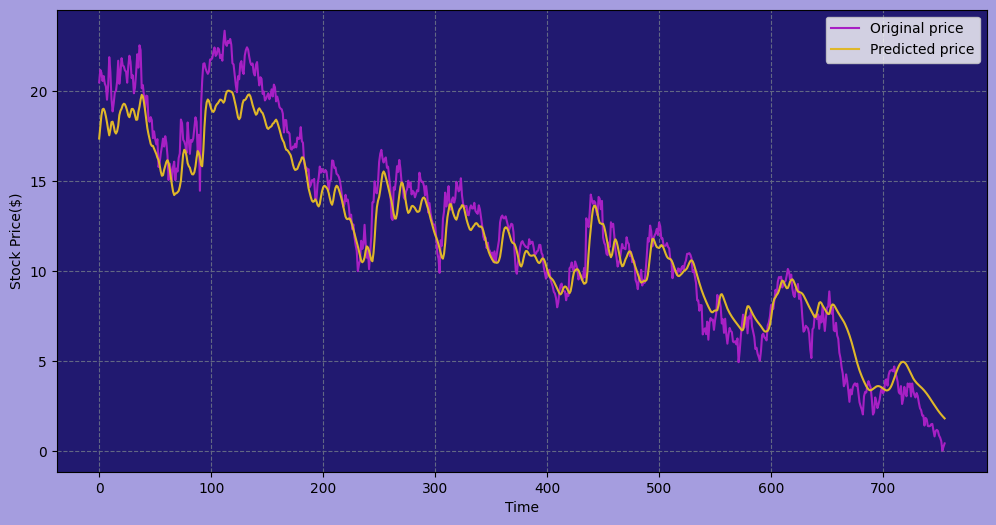

In [43]:
fig=plt.figure(figsize=(12,6))
fig.patch.set_facecolor('#A59DDF')

ax=plt.axes()
ax.set_facecolor('#211970')

plt.grid(True,linestyle='--',color='#626784')
plt.plot(y_test,'#A720C4',label="Original price")
plt.plot(y_predicted,'#DFB729',label="Predicted price")

plt.xlabel('Time')
plt.ylabel('Stock Price($)')
plt.legend()
plt.show()

In [44]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import xgboost as xgb

# ... (Load and preprocess your time series data) ...

# Scale numerical features
scaler = MinMaxScaler(feature_range=(0,1))
data_training_array = scaler.fit_transform(data_training)

y = data_training['Open'].values


# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
   data_training_array, y, test_size=0.2, shuffle=False
)

# Reshape data for LSTM (samples, timesteps, features)
X_train_lstm = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_lstm = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])



In [45]:
lstm_features_train = model.predict(X_train_lstm)
lstm_features_test = model.predict(X_test_lstm)

# Train XGBoost model
model_xgb = xgb.XGBRegressor()
model_xgb.fit(lstm_features_train, y_train)

# Make predictions
y_pred = model_xgb.predict(lstm_features_test)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [46]:
# Evaluate the performance of the combined model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (Combined Model):", mse)
print("R-squared Score (Combined Model):", r2)

Mean Squared Error (Combined Model): 218.11681605047937
R-squared Score (Combined Model): -0.9154332464023338
